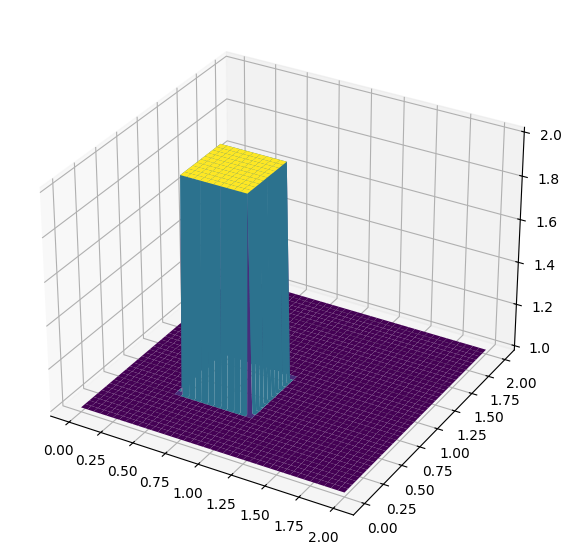

In [3]:
from mpl_toolkits.mplot3d import Axes3D  # 3D plotting tools
import numpy
from matplotlib import pyplot, cm

# Variable declarations
nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))  # Create a 2D array filled with ones
un = numpy.ones((ny, nx))

# Assign initial conditions: "hat function"
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2 

# Plot Initial Condition
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')  # Correct way to create a 3D plot

X, Y = numpy.meshgrid(x, y)  # Create mesh grid for 3D surface
surf = ax.plot_surface(X, Y, u, cmap=cm.viridis)  # Plot surface

pyplot.show()  # Show the plot


In [9]:
X.shape
x.shape

(81,)

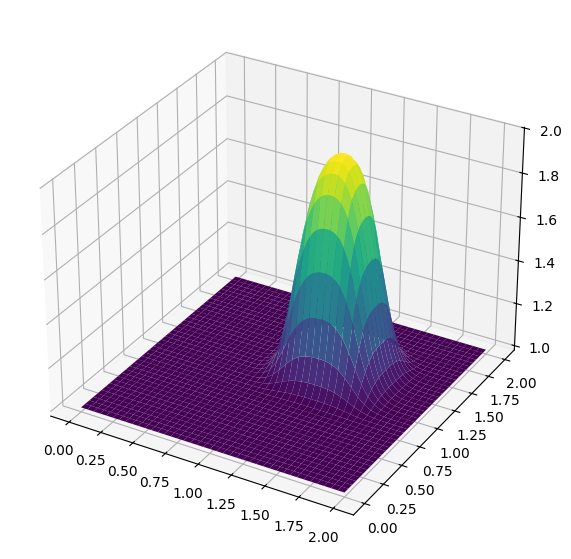

In [12]:
u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                              (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')  # Correct way to create a 3D plot
surf2 = ax.plot_surface(X, Y, u, cmap=cm.viridis)